Link to Github repository: https://github.com/fridamariejoergensen/CSS_assignment2.git

### Contribution Statement

We, Frida(s206182), Cecilie(s214605), and Marie(s204052), collaborated on Assignment 2 in Jupyter Notebook.

All members collaborated and contributed to multiple parts of the assignment.

In [125]:
import nltk
import math
nltk.download('stopwords')
import pandas as pd
import pickle
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import networkx.algorithms.community as nx_community
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
import networkx.algorithms.community as nx_comm
import netwulf
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fridajorgensen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Assignment 2

## Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity.

**For each node, compute the fraction of edges that connect to a node that works in the same top field. Find the average value across all nodes.**

In [44]:
# Loading our CSS network 
G = nx.read_gml('css_network_update.json')

fractions = []
for i in list(nx.get_node_attributes(G, 'topField').keys()):
        #fields[i] = list(nx.get_node_attributes(G, 'topField').values())
        neighbors = G.neighbors(i)
        for n in neighbors:
            count = 0
            if nx.get_node_attributes(G, 'topField')[n] == nx.get_node_attributes(G, 'topField')[i]:
                count += 1
            fractions.append(count / G.degree[i])

av_frac = np.mean(fractions)
print('The average values across all nodes is:' + str(av_frac))

The average values across all nodes is:0.11079391145579195


**Create a new graph, with the same nodes and edges, but where the association between nodes and field is shuffled. Compute the measure above for this randomized graph.**

In [45]:
# Making a copy of the network
copy_G = G.copy()
# Assessing 'topField' attribute
field_list = list(nx.get_node_attributes(copy_G, 'topField').values())
# Shuffeling list of 'topField' attributes
random.shuffle(field_list)
# Setting node attribute as the shuffled attributes
shuffled = dict(zip(copy_G, field_list))
nx.set_node_attributes(copy_G, shuffled, 'topField')

# Computing fraction as above
fractions = []
for i in list(nx.get_node_attributes(copy_G, 'topField').keys()):
        neighbors = copy_G.neighbors(i)
        for n in neighbors:
            count = 0
            if nx.get_node_attributes(copy_G, 'topField')[n] == nx.get_node_attributes(copy_G, 'topField')[i]:
                count += 1
            fractions.append(count / copy_G.degree[i])
av_frac = np.mean(fractions)
print('The average values across all nodes in randomized graph is:' + str(av_frac))

The average values across all nodes in randomized graph is:0.10298991673581073


**Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Is the chance to connect to a member of the same field significantly higher than it would be by chance?**

In [46]:
X = []
# For loop for 100 repetitions
for i in range(100):
    copy_G = G.copy()
    # Assessing 'topField' attributes
    field_list = list(nx.get_node_attributes(copy_G, 'topField').values())
    # Shuffling attribute list 
    random.shuffle(field_list)
    # Setting shuffled attribute list as new attribute
    shuffled = dict(zip(copy_G, field_list))
    nx.set_node_attributes(copy_G, shuffled, 'topField')
    
    # Computing fraction as before
    fractions = []
    for i in list(nx.get_node_attributes(copy_G, 'topField').keys()):
            neighbors = copy_G.neighbors(i)
            for n in neighbors:
                count = 0
                if nx.get_node_attributes(copy_G, 'topField')[n] == nx.get_node_attributes(copy_G, 'topField')[i]:
                    count += 1
                fractions.append(count / copy_G.degree[i])
    X.append(np.mean(fractions))

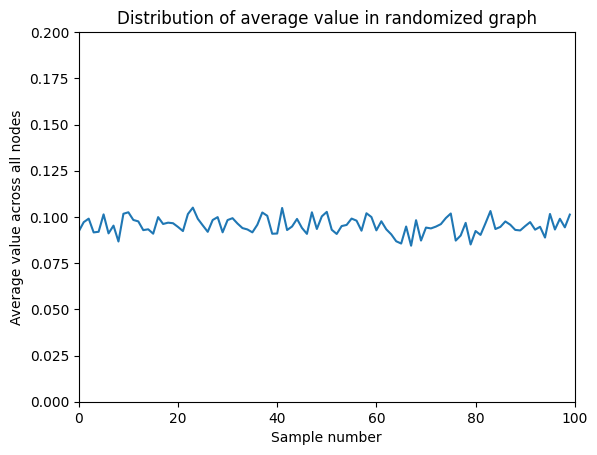

In [11]:
# Plotting the distribution of values
Y = np.arange(100)
plt.plot(Y,X)
plt.xlim(0,100)
plt.ylim(0,1)
plt.ylabel('Average value across all nodes')
plt.xlabel('Sample number')
plt.title('Distribution of average value in randomized graph')
plt.ylim(0,0.2)
plt.show()

The chance to connect to a member of the same field in the real network is not significantly higher than it would be by chance, actually the values are approximately equal.

**Compute the assortativity coefficient with respect to author's field. How do you interpret the value you obtain?**

In [30]:
def attribute_assortativity_coefficient(G, attribute):
    # get the mixing matrix for the attribute
    mixing_matrix = nx.attribute_mixing_matrix(G, attribute)
    
    # calculate the row and column sums of the mixing matrix
    row_sums = mixing_matrix.sum(axis=1)
    col_sums = mixing_matrix.sum(axis=0)
    
    # calculate the assortativity coefficient using the formula
    numerator = np.sum(np.multiply(mixing_matrix, np.outer(row_sums, col_sums)))
    denominator = np.sum(np.multiply(mixing_matrix, np.outer(row_sums, row_sums)))
    assortativity_coefficient = (numerator - denominator) / (1 - denominator)
    
    return assortativity_coefficient

asso_coef_css = attribute_assortativity_coefficient(G, 'topField')
print('Assortativity coefficient for CSS network is:' + str(asso_coef_css))

Assortativity coefficient for CSS network is:-3.4585341738992373e-17


The value found for the assortativity coefficient is very small meaning that people in the same fields doesn't tend to connect (have an edge between them in the network).

**Is the graph assortative with respect to the degree? (e.g. do high-degree scientists tend to link to other high-degree scientists, and low-degree scientists to other low-degree scientists?). Provide an interpretation of your answer.**

In [31]:
degree_asso_coef = nx.degree_assortativity_coefficient(G)
print('Degree assortativity coefficient for CSS network is:' + str(degree_asso_coef))

Degree assortativity coefficient for CSS network is:-0.07905783854646832


As the values is negative it means that high-degree scientits doesnt tend to link to other high-degree scientists (same for low-degree scientists).

## Part 2: Communities

### Exercise 2: Zachary's karate club:

**Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute)**

In [2]:
# Visualizing
data_graph = nx.karate_club_graph()
netwulf.interactive.visualize(data_graph)

(None, None)

In [3]:
# Coloring each node based in club split
club = nx.get_node_attributes(data_graph, 'club')
nx.set_node_attributes(data_graph, club, 'group')
netwulf.interactive.visualize(data_graph)

(None, None)

**Write a function to compute the modularity of a graph partitioning**

In [4]:
# Function for computing modularity of graph partinioning
def compute_modularity(G, partition):
    m = G.size(weight='weight')

    partition_weight = {p: 0 for p in set(partition.values())}
    partition_degree = {p: 0 for p in set(partition.values())}
    for u, v, data in G.edges(data=True):
        if partition[u] == partition[v]:
            partition_weight[partition[u]] += data['weight']
            partition_degree[partition[u]] += data['weight']

    Q = 0
    for p in set(partition.values()):
        Q += (partition_weight[p] / m) - ((partition_degree[p] / (2 * m)) ** 2)
    return Q

**Explain in your own words the concept of modularity**

Modularity is a measure of how good a division of a larger network into smaller communities is.Communities is defined by having a large amount of connections inside the community, but few connections that go outside the community (meaning they are a densely connected group). When calculating modularity it uses edge-betweeness.

**Compute the modularity of the Karate club split partitioning using the function you just wrote**

In [6]:
# Compute modularity of the Karate club split partitioning
club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}

dict = {}
for i in club1:
    dict[i] = 1
for i in club2:
    dict[i] = 2

club_mod = compute_modularity(data_graph, dict)
print('The modularity for the Karate "club" split is: ' + str(club_mod))

The modularity for the Karate "club" split is: 0.7922827533217144


**We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm.**

**Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.**

In [7]:
# 5/6. Perform randomization experiment to assess if the modularity is statitically different from 0
rand_graph = data_graph.copy()
print('Number of edges in G before swap: ' + str(len(data_graph.edges)))

# implement the double edge swap algorithm
nx.double_edge_swap(rand_graph, nswap=90, max_tries=500)
print('Number of edges in G before swap: ' + str(len(rand_graph.edges)))


Number of edges in G before swap: 78
Number of edges in G before swap: 78


**Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.**

In [8]:
import networkx.algorithms.community as nx_comm
modularities = []

for i in range(1000):
    rand_G = data_graph.copy()
    nx.double_edge_swap(rand_G, nswap=90, max_tries=500)
    
    com_hi = {x for x,y in rand_G.nodes(data=True) if y['group']=='Mr. Hi'}
    com_of = {x for x,y in rand_G.nodes(data=True) if y['group']=='Officer'}
    
    modularities.append(nx_comm.modularity(rand_G, [com_hi, com_of]))

**Compute the average and standard deviation of the modularity for the random network.**

In [9]:
# Average and standard deviation
av = np.mean(modularities)
std = np.std(modularities)

print('Average of modularities is ' + str(av))
print('Standard deviation of modularities ' + str(std))

Average of modularities is 0.07280402723119822
Standard deviation of modularities 0.05169662751526167


**Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).**

The actual modularity is 0.39143756676224206


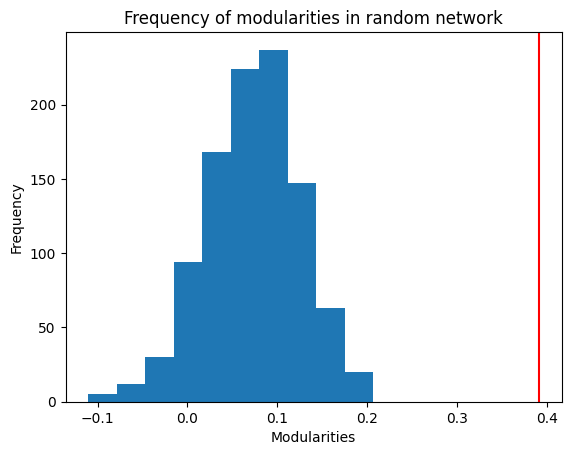

In [10]:
actual_mod = nx_comm.modularity(data_graph, [{x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}, {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}])

print('The actual modularity is ' + str(actual_mod))

plt.hist(modularities)
plt.xlabel('Modularities')
plt.ylabel('Frequency')
plt.title('Frequency of modularities in random network')
plt.axvline(actual_mod, color='red')

**Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?**

No, the club split is not a good partitioning, which is seen as the distribution doesn't even hold the actual value. We performed a randomization experiment to check if the split into clubs can be considered to be the same as if they were randomly assigned to each club. This is also the reason why we preserve the nodes, such that this specific comparison can be made.

**Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?**

In [11]:
# Value of modularity using Louvain-algorithm  
communities_z = nx_comm.louvain_communities(data_graph)
modularity_z = nx_comm.modularity(data_graph, communities_z)
print('The modularity of Louvain algorithm is ' + str(modularity_z))

The modularity of Louvain algorithm is 0.4438541256723075


The value found by Louvain is higher than the actual value found for the 'club' split. This comparison reveals that the Louvain algorithm has found better communities than dividing the network by the clubs.

**Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.**

In [13]:
# Compute confusion matrix
club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}
comm_club = [club1, club2]

D = np.zeros((len(communities_z), len(comm_club)))

for i in range(len(comm_club)):
    for n in comm_club[i]:
        for j in range(len(communities_z)):
            if n in communities_z[j]:
                D[j][i] += 1

print('Confusion matrix is: ')
print(D)

Confusion matrix is: 
[[ 5.  0.]
 [ 1. 13.]
 [11.  0.]
 [ 0.  4.]]


From the confusion matrix we see that the Louvain algorithm divided the network into 4 communities. As each entry in the confusion matrix corresponds to the number of nodes each of the communities the club split have in common with each of the communities in the Louvain split it is clear, that only 1 node has floated to a club split while all others have every node from each Louvain community in the same club split. Also it tells us that the club split can be splitted once more into smaller communities, since 2 of the Louvain communities correspond to each club split.

### Exercise 3: Community detection on the network of Computational Social Scientists.

**Consider the network you built in Week 4.**

**Use the Python Louvain-algorithm implementation to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0?**

In [51]:
# Loading our CSS network
G = nx.read_gml('css_network_update.json')

# Finding communities
import networkx.algorithms.community as nx_community
communities = nx_community.louvain_communities(G)

no_comm = len(communities)
print('The number of communities is ' + str(no_comm))

size_comm = []
for i in range(no_comm):
    size_comm.append(len(communities[i]))
print('The sizes of the communities are: ' + str(size_comm))

modularity = nx_community.modularity(G, communities)
print('The modularity is ' + str(modularity))

The number of communities is 93
The sizes of the communities are: [31, 2, 18, 2, 14, 1, 28, 18, 22, 1, 1, 1, 1, 30, 1, 3, 6, 6, 1, 1, 1, 43, 1, 31, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 6, 2, 5, 1, 1, 1, 30, 2, 1, 17, 2, 20, 1, 1, 1, 1, 7, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
The modularity is 0.82565828816934


The value of modularity is not significantly different from 0.

**Visualize the network, using netwulf (see Week 5). This time assign each node a different color based on their community. Describe the structure you observe.**

In [17]:
# Visualize network
binary_comm = {}
for i in G.nodes:
    for j in communities:
        if i in j:
            binary_comm[i] = communities.index(j)

nx.set_node_attributes(G, binary_comm, 'group')
netwulf.interactive.visualize(G)

(None, None)

The structure of the network is a bit cluttered in the middle, and then many lonely nodes around as well as nodes with a small amount of connections. This network has only been made on 100.000 authorIds from our paper datafram (found in the beginning of the course), because we didn't have the resources to run through all authorIds.

In [47]:
from networkx.readwrite import json_graph
css_network_update = json_graph.node_link_data(G)
nx.write_gml(G, "css_network_update.json")

**Make sure you save the assignment of authors to communities.**

## Part 3: TF-IDF.

### Exercise 4: TF-IDF and the Computational Social Science communities.

TF-IDF is an approach for representing text that involves the product of two components, term frequency (TF) and inverse document frequency (IDF). The term frequency is determined by dividing the number of occurrences of a specific word in a sentence by the total number of words in that sentence. The inverse document frequency is calculated by taking the logarithm of the total number of sentences in the corpus divided by the number of sentences that contain the specific word. The resulting TF-IDF score is obtained by multiplying the TF and IDF values for each word.

An advantage of TF-IDF over other text representation techniques, such as the bag of words model, is its ability to give an estimation of the semantic meaning of words. While the bag of words model simply represents words as binary values (either present or absent), TF-IDF scores indicate the relative importance of words in different sentences by comparing their scores. For example, if a word is present in every sentence of a corpus, its IDF value would be log(1)=0, resulting in a TF-IDF score of 0 for that word, indicating that it does not convey any special meaning in those sentences.


**Find the assignment of each author to their network community, and the degree of each author.**


In [ ]:
# Loading network pickle
with open('graph_15000.pickle', "rb") as f:
        css_graph = pickle.load(f)
print(css_graph)

In [54]:
G = css_graph
communities = nx_community.louvain_communities(G)

# Dictionary for community assignments and degree of each author
data = {'authorIds': [], 'Community': [], 'Degree': []}

# Loop over each author in the network
for author in G.nodes():
    data['authorIds'].append(author)
    
    for i, community in enumerate(communities):
        if author in community:
            data['Community'].append(i)
            break
    
    data['Degree'].append(G.degree(author))

# Create dataframe
df_community = pd.DataFrame(data)
df_community


,authorIds,Community,Degree
0,1726746,0,2
1,3268721,0,2
2,144923779,339,4
3,7359134,339,12
4,31745664,41,11
...,...,...,...
10407,145803385,635,1
10408,30353442,635,1
10409,1848717,636,1
10410,1685722,636,1


In [67]:
# Group dataframe by community
df_grouped = df_community.groupby('Community')

# Loop over each community
for community, group in df_grouped:
    author_ids = group['authorIds'].tolist()
    # print(f"Community {community}: {author_ids}")
    

In [106]:
# Loading paper pickle (and exploding column authorId)
with open('css_papers_15000.pickle', "rb") as f:
        css_papers = pickle.load(f)    
        css_papers = css_papers.explode('authorIds')  
css_papers.shape


(20939, 8)

In [111]:
merged_df = df_community.merge(css_papers, on='authorIds')
merged_df.shape

(20828, 10)

In [112]:
# Loading abstract pickle
with open('css_abstract_15000.pickle', "rb") as f:
        css_abstract = pickle.load(f)

In [113]:
# Load stop words
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token != 'none' and token != 'nan']
    return tokens

# Tokenize and save in new column 'tokens'
css_abstract['abstract'] = css_abstract['abstract'].astype(str)
css_abstract['tokens'] = css_abstract['abstract'].apply(tokenize_text)

css_abstract.shape

(6709, 3)

In [116]:
Complete_df = merged_df.merge(css_abstract, on='paperId')
Complete_df.shape

(24439, 12)

**Create several *large documents, one for each community*. Each document includes all the tokens of abstracts written by members of a given community.**

In [117]:
# create a dictionary to store tokens for each community
community_tokens = {}

# loop through each community
for c in Complete_df["Community"].unique():
    
    # filter merged_data to get only papers written by members of community c
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    # create an empty list to store tokens from all papers written by members of community c
    community_tokens[c] = []
    
    # loop through each paper written by members of community c
    for paper in papers:
        
        # get tokens for the paper
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        
        # add tokens to the list for the community
        community_tokens[c] += tokens


**Find the top 5 terms within the top 5 communities (by number of authors).**

In [132]:
from collections import Counter
# Top 5 communities 
top_communities5 = Complete_df["Community"].value_counts().head(5).index.tolist()

for c in top_communities5:
    print("Community:", c)
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        # get tokens
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        # add tokens to list for specific community
        tokens_list += tokens
    token_freq = Counter(tokens_list)
    
    print("Top 5 tokens:")
    for token, freq in token_freq.most_common(5):
        print(token, freq)
    
    print("----------------------------")



Community: 267
Top 5 tokens:
agents 1217
show 1028
mechanism 910
market 889
model 837
----------------------------
Community: 163
Top 5 tokens:
data 1148
social 936
mobility 702
model 515
show 493
----------------------------
Community: 66
Top 5 tokens:
social 1466
data 500
study 415
show 406
results 367
----------------------------
Community: 466
Top 5 tokens:
social 482
model 456
network 430
different 421
cooperation 413
----------------------------
Community: 132
Top 5 tokens:
data 559
social 448
urban 372
human 322
cities 304
----------------------------


**Describe similarities and differences between the communities.**
<br>
"Social" and "data" are common tokens in multiple communities. For example, both communities 163 and 66 have "social" and "data" among their top 5 tokens. This makes sense, since most communities within CCS are likely to be interested in social data analysis. "Model" is a common token among multiple communities as well, including communities 267, 163, and 466. In general we can see that many of the top tokens are being shared. However, there are some unique tokens for each community. Community 267 has "agents", "mechanism" and "market" indicating an interest in one subfield of CSS and while community 132 has "urban" and "cities", indicating an interest in another subfield, such as urban studies.


**Why aren't the TFs not necessarily a good description of the communities?**

However, the TFs are not necessarily a good description or basis of comparison for the communities. It gives a very superficial insight into a community, as it only helps identify the most frequent words used by the community, but not their context. Some words may have high TF within a specific community, but they may not be unique to that community and may not provide much information about the community's characteristics or differences from other communities. The size of the communities also varies a lot. Taking this into account, the TFs for the same word in the different communities may not be directly comparable. 


In [127]:
# Dictionary for IDF scores
idf_scores = {}

for c in top_communities5:
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        # get tokens
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        # add tokens to the list
        tokens_list += tokens
    token_freq = Counter(tokens_list)
    
    # calculate IDF score for each token
    idf_scores[c] = {}
    for token, freq in token_freq.items():
        idf_scores[c][token] = math.log(len(papers) / freq)

for c in top_communities5:
    print("Community:", c)
    top_idf_scores = sorted(idf_scores[c].items(), key=lambda x: x[1], reverse=True)[:5]
    for token, score in top_idf_scores:
        print(token, score)
    print("----------------------------")

Community: 267
wellbeing 7.510430556378006
children 7.510430556378006
gendered 7.510430556378006
redditcom 7.510430556378006
seven 7.510430556378006
----------------------------
Community: 163
twelve 7.285506548522785
england 7.285506548522785
frequencies 7.285506548522785
layers 7.285506548522785
daytime 7.285506548522785
----------------------------
Community: 66
workforces 7.1731917424865985
ondemand 7.1731917424865985
deeply 7.1731917424865985
shifted 7.1731917424865985
rights 7.1731917424865985
----------------------------
Community: 466
tiny 6.959398512133975
perturbations 6.959398512133975
criticality 6.959398512133975
shifting 6.959398512133975
committed 6.959398512133975
----------------------------
Community: 132
toward 6.940222469119639
technosocial 6.940222469119639
konstantinos 6.940222469119639
trantopoulos 6.940222469119639
markus 6.940222469119639
----------------------------


**Calculate TF-IDF. Do that for the top 9 communities**

In [131]:
top_communities9 = Complete_df["Community"].value_counts().nlargest(9).index.tolist()

idf_scores2 = {}
for c in top_communities:
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        tokens_list += tokens
        
    token_freq = Counter(tokens_list)

    idf_scores2[c] = {}
    for token, freq in token_freq.items():
        idf_scores2[c][token] = math.log(len(papers) / freq)

# Dictionary for TF-IDF scores
tfidf_scores = {}

for c in top_communities:
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        tokens_list += tokens
    
    token_freq = Counter(tokens_list)
    
    # calculate TF-IDF score
    tfidf_scores[c] = {}
    for token, freq in token_freq.items():
        tf = freq / len(tokens_list)
        idf = idf_scores[c][token]
        tfidf_scores[c][token] = tf * idf
    
    # Top 10 TF words for the community
    top_tf_scores = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    print("Community", c, "top 10 TF words:")
    for token, score in top_tf_scores:
        print(token, score)
    print("----------------------------")
    
    # Top 10 TF-IDF words for the community
    top_tfidf_scores = sorted(tfidf_scores[c].items(), key=lambda x: x[1], reverse=True)[:10]
    print("Community", c, "top 10 TF-IDF words:")
    for token, score in top_tfidf_scores:
        print(token, score)
    print("----------------------------")

Community 267 top 10 TF words:
agents 1217
show 1028
mechanism 910
market 889
model 837
mechanisms 755
information 720
data 687
optimal 671
social 655
----------------------------
Community 267 top 10 TF-IDF words:
optimal 0.004161340889468678
data 0.004160333676801618
social 0.004159985729326896
problem 0.004156210478214282
study 0.0041555654235132695
information 0.0041510279477004605
mechanisms 0.004130930875232992
games 0.004126473044781241
equilibrium 0.004120345125783364
one 0.00409053794454786
----------------------------
Community 163 top 10 TF words:
data 1148
social 936
mobility 702
model 515
show 493
network 413
countries 388
epidemic 383
ties 373
however 348
----------------------------
Community 163 top 10 TF-IDF words:
model 0.00564094117709302
show 0.005626360358244755
network 0.0054825377733168255
countries 0.005405501878101742
mobility 0.00540190328740495
epidemic 0.005388095289079103
ties 0.005351213220349591
however 0.005246498048031602
using 0.005237322102627628
popu

**Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?** 
<br> <br>
The top 10 TF-IDF words are more descriptive than the TF words. This makes sense, since it weights the frequency by the inverse document frequency. In general, the tokens with the highest IDF scores tend to be more specific for the community and less commonly used, so including the IDF scores allows us to see which words set the communities apart, which is often a good indication of what makes the community special aswell. Analyzing communities of authors based on the top TF-IDF words is a better approach than TF in order to capture unique characteristics for each.

**List the top 3 authors (by degree)**

In [133]:
# Top 3 authors from 9 biggest communities
largest_communities = df_community['Community'].value_counts().nlargest(9).index.tolist()
community_df_filtered = df_community.loc[df_community['Community'].isin(largest_communities)]
community_df_filtered_sorted = community_df_filtered.sort_values(by=['Community', 'Degree'], ascending=[True, False])
top_authors_by_community = community_df_filtered_sorted.groupby('Community').head(3)

print(top_authors_by_community)

      authorIds  Community  Degree
344     1682773         66     134
535     1705156         66      78
46    145512647         66      51
275   144626042         76      88
445    48106342         76      63
1031    1805612         76      46
1680  145856934        101      44
2013  145832870        101      37
863    32980371        101      36
565   145320204        132     148
948    38451395        132      66
698     1696039        132      55
79      1821014        163      72
531     1684687        163      59
427     2349638        163      45
1049    1712423        220      80
1716    1830872        220      42
1211    1733303        220      40
360    30907562        267      90
713   117745152        267      58
220   144830983        267      54
281   144041798        268      47
280     2905635        268      33
1062    1806767        268      28
548    40191926        466      91
237   143634219        466      72
1140    4219233        466      49


### Exercise 5: The Wordcloud.

**Create word-cloud for each community. Print the names of the top three authors in each community.**

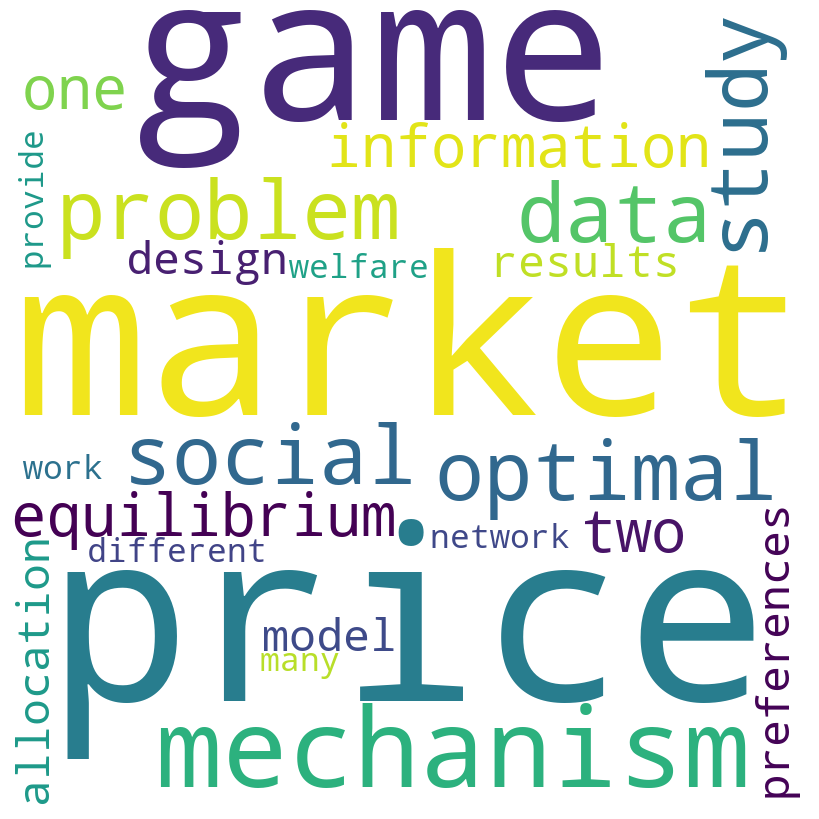

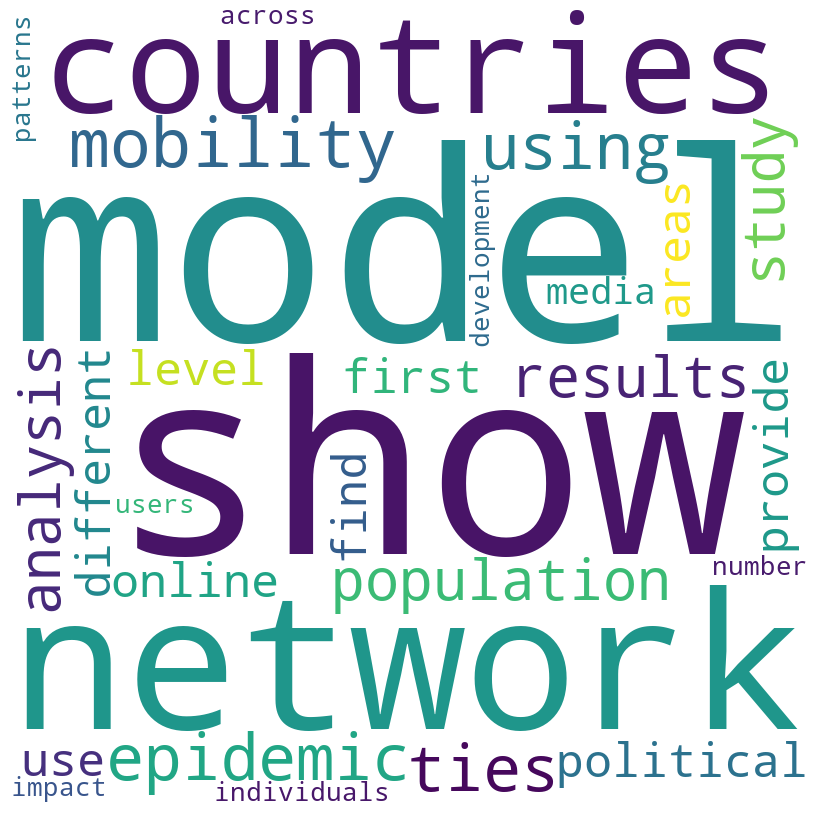

KeyError: 101

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate wordcloud
def generate_wordcloud(data):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(data)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

# Top 3 authors from 9 biggest communities
largest_communities = df_community['Community'].value_counts().nlargest(9).index.tolist()


# Generate wordcloud for each community
for community in largest_communities:
    # Get the top 3 authors for the current community
    top_authors = top_authors_by_community.loc[top_authors_by_community['Community'] == community]['authorIds'].tolist()
    # Get the TF-IDF words for the current community
    tfidf_words = [word[0] for word in sorted(tfidf_scores[community].items(), key=lambda x: x[1], reverse=True)[:30]]
    # Combine the top 3 authors and top 50 words
    data = " ".join(top_authors) + " " + " ".join(tfidf_words)
    # Generate the wordcloud
    generate_wordcloud(data)

**Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?**

**Look up online the top author in each community. In light of your search, do your results make sense?**